# Sentiment Analysis of Reddit Comments on Israel and Palestine Conflict: A Social Discourse Study

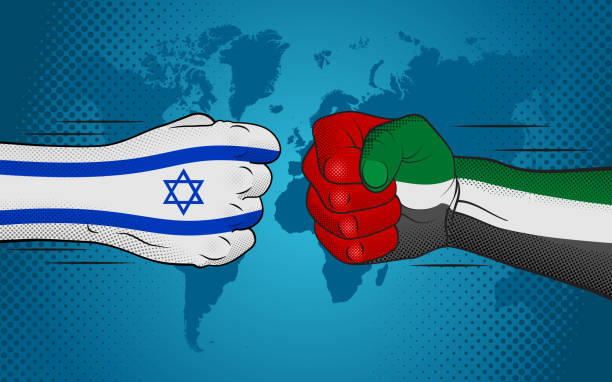

In [1]:
# An Machine Learning project by: Prof. Nirmal Gaud
# Contact: ds.ml.projects.sessions.1@gmail.com 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('/Users/elarnyo/Downloads/pls_isl_conflict_comments.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfe in position 32007: invalid start byte

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.nunique()

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int', 'float']).columns
print("\nNumerical type columns:")
print(numerical_columns)

In [ ]:
df['subreddit'].unique()

In [ ]:
df['subreddit'].value_counts()

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df['subreddit'], data = df, palette = 'hls')
plt.xticks(rotation = -45)
plt.show()

In [ ]:
plt.figure(figsize=(30,20)) 
plt.pie(df['subreddit'].value_counts(), labels=df['subreddit'].value_counts().index, 
        autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                       'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Subreddit', size=20, **hfont) 
plt.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=df['subreddit'].value_counts().index, 
                                 y=df['subreddit'].value_counts())])
fig.update_layout(title='Subreddit', xaxis_title='Subreddit', yaxis_title="Count")
fig.show()

In [ ]:
fig = px.pie(df, names='subreddit', title = 'Subreddit')
fig.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df['score'], kde = True, bins = 5, palette = 'hls')
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(df['score'], kde = True, bins = 5)
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(df['score'], data = df, palette = 'hls')
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.violinplot(df['score'], data = df, palette = 'hls')
plt.show()

In [ ]:
fig = go.Figure(data=[go.Histogram(x=df['score'], nbinsx=5)])
fig.update_layout(title='Histogram of score', xaxis_title='score', yaxis_title='Count')
fig.show()

In [ ]:
fig = px.box(df, y='score', title=f'Box Plot Score')
fig.show()

In [ ]:
fig = px.violin(df, y='score', title=f'Box Plot Score')
fig.show()

In [ ]:
df_new = df.copy()

In [ ]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [ ]:
df_new['self_text'] = df_new['self_text'].apply(lambda x: clean_text(x))

In [ ]:
import string
string.punctuation

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
df_new['self_text']= df_new['self_text'].apply(lambda x:remove_punctuation(x))

In [ ]:
import re

In [ ]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [ ]:
df_new['self_text']= df_new['self_text'].apply(lambda x: tokenization(x))

In [ ]:
import nltk
from wordcloud import WordCloud

In [ ]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    output= " ".join(i for i in text if i not in stopwords)
    return output

In [ ]:
df_new['self_text']= df_new['self_text'].apply(lambda x:remove_stopwords(x))

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [ ]:
df_new['self_text']=df_new['self_text'].apply(lambda x:lemmatizer(x))

In [ ]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip() 
    text = re.sub('\S*\d\S*\s*','', text).strip()  
    return text.strip()

In [ ]:
df_new['self_text'] = df_new['self_text'].apply(lambda x: clean_text(x))

In [ ]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [ ]:
df_new['self_text'] = df_new['self_text'].apply(lambda x: remove_urls(x))

In [ ]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [ ]:
df_new['self_text'] = df_new['self_text'].apply(lambda x: remove_digits(x))

In [ ]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [ ]:
df_new['self_text'] = df_new['self_text'].apply(lambda x: remove_emojis(x))

In [ ]:
df_new['self_text'] = df_new['self_text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [ ]:
df_new['self_text'] = df_new['self_text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [ ]:
df_new

In [ ]:
from textblob import TextBlob

In [ ]:
df_new['sentiment'] = df_new['self_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [ ]:
df_new

In [ ]:
sentiment_correlation = df_new[['score', 'sentiment']].corr()
print('Correlation between "score" and sentiment:')
print(sentiment_correlation)

In [ ]:
average_score_per_subreddit = df_new.groupby('subreddit')['score'].mean()
print('Average score per subreddit:')
print(average_score_per_subreddit)

In [ ]:
df_new['created_time'] = pd.to_datetime(df_new['created_time'])

In [ ]:
score_over_time = df_new.set_index('created_time').resample('D')['score'].mean()
print('Score trends over time:')
print(score_over_time)

In [ ]:
df_new['text_length'] = df_new['self_text'].apply(len)

In [ ]:
length_correlation = df_new[['score', 'text_length']].corr()
print('Correlation between "score" and text length:')
print(length_correlation)

In [ ]:
from collections import Counter

In [ ]:
def word_frequency(word):
    return df_new[df_new['self_text'].str.contains(word, case=False, na=False)]['score'].mean()

word_example_frequency = word_frequency('example')
print('Average score for comments containing the word "example":', word_example_frequency)

In [ ]:
plt.figure(figsize=(15,6))
plt.hist(df_new['text_length'], bins=30, edgecolor='black')  
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Length')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [ ]:
text_data = df_new['self_text'].astype(str)

In [ ]:
vectorizer = CountVectorizer(max_df=0.85, stop_words='english')
text_vectorized = vectorizer.fit_transform(text_data)

In [ ]:
num_topics = 5  
lda = LDA(n_components=num_topics, random_state=42)
lda.fit(text_vectorized)

In [ ]:
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10 - 1:-1]])
    print()

In [ ]:
df_new

In [ ]:
highest_score_index = df_new['score'].idxmax()

lowest_score_index = df_new['score'].idxmin()

highest_score_text = df_new.loc[highest_score_index, 'self_text']
highest_score = df_new.loc[highest_score_index, 'score']

lowest_score_text = df_new.loc[lowest_score_index, 'self_text']
lowest_score = df_new.loc[lowest_score_index, 'score']

print(f"Comment with the highest score ({highest_score}):")
print(highest_score_text)
print("\n")

print(f"Comment with the lowest score ({lowest_score}):")
print(lowest_score_text)

In [ ]:
def categorize_sentiment(polarity):
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df_new['sentiment_category'] = df_new['sentiment'].apply(categorize_sentiment)

In [ ]:
df_new

In [ ]:
df_new['sentiment_category'].unique()

In [ ]:
df_new['sentiment_category'].value_counts()

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df_new['sentiment_category'], data = df_new, palette = 'hls')
plt.show()

In [ ]:
plt.figure(figsize=(30,20)) 
plt.pie(df_new['sentiment_category'].value_counts(), labels=df_new['sentiment_category'].value_counts().index, 
        autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                       'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Sentiment Category', size=20, **hfont) 
plt.show()

In [ ]:
def map_sentiment_to_numeric(sentiment_category):
    if sentiment_category == 'Positive':
        return 1
    elif sentiment_category == 'Negative':
        return -1
    else:
        return 0

In [ ]:
df_new['sentiment_numeric'] = df_new['sentiment_category'].apply(map_sentiment_to_numeric)

In [ ]:
df3 = df_new[['self_text', 'sentiment_numeric']]

In [ ]:
df3

In [ ]:
positive_text_data = ' '.join(df_new[df3['sentiment_numeric'] == 1]['self_text'])  

if positive_text_data:
    wordcloud = WordCloud(background_color='white').generate(positive_text_data)

    fig, ax = plt.subplots(figsize=(30, 10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.show()
else:
    print('No positive text data to generate a word cloud.')

In [ ]:
negative_text_data = ' '.join(df_new[df3['sentiment_numeric'] == -1]['self_text'])  

if negative_text_data:
    wordcloud = WordCloud(background_color='white').generate(negative_text_data)

    fig, ax = plt.subplots(figsize=(30, 10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.show()
else:
    print('No negative text data to generate a word cloud.')

In [ ]:
neutral_text_data = ' '.join(df_new[df3['sentiment_numeric'] == 0]['self_text'])  

if neutral_text_data:
    wordcloud = WordCloud(background_color='white').generate(neutral_text_data)

    fig, ax = plt.subplots(figsize=(30, 10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.show()
else:
    print('No neutral text data to generate a word cloud.')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = df_new['self_text']  
y = df_new['sentiment_numeric']

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

In [ ]:
y_pred = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

In [ ]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

In [ ]:
y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)

In [ ]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

In [ ]:
accuracies = {
    'Logistic Regression': lr_accuracy,
    'Decision Tree': dt_accuracy,
}

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(x=list(accuracies.keys()), y=list(accuracies.values()))
    ],
    layout={
        'title': 'Model Comparison: Accuracy',
        'xaxis': {'title': 'Models'},
        'yaxis': {'title': 'Accuracy'}
    }
)
fig.show()